**İMPORT KUTUPHANE VE METRİKLER**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings("ignore")

DRİVE **BAĞLANTISI**

In [1]:
from google.colab import drive

# Google Drive'ı bağlayın
drive.mount('/content/drive')

Mounted at /content/drive


**OKUMA**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/web-page-phishing.csv" , sep=",", encoding='utf-8')

In [5]:
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [8]:
df.isnull().sum()/df.shape[0]

url_length        0.0
n_dots            0.0
n_hypens          0.0
n_underline       0.0
n_slash           0.0
n_questionmark    0.0
n_equal           0.0
n_at              0.0
n_and             0.0
n_exclamation     0.0
n_space           0.0
n_tilde           0.0
n_comma           0.0
n_plus            0.0
n_asterisk        0.0
n_hastag          0.0
n_dollar          0.0
n_percent         0.0
n_redirection     0.0
phishing          0.0
dtype: float64

**VERİ DEĞER ARALIĞINI KUCULTME**

In [16]:
df.columns.tolist()


['url_length',
 'n_dots',
 'n_hypens',
 'n_underline',
 'n_slash',
 'n_questionmark',
 'n_equal',
 'n_at',
 'n_and',
 'n_exclamation',
 'n_space',
 'n_tilde',
 'n_comma',
 'n_plus',
 'n_asterisk',
 'n_hastag',
 'n_dollar',
 'n_percent',
 'n_redirection',
 'phishing']

In [10]:
st = StandardScaler()

In [17]:
df["url_length"] = st.fit_transform(df[["url_length"]])


In [22]:
df.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000,100077.0000
mean,-0.0000,2.2244,0.4052,0.1377,1.1354,0.0244,0.2158,0.0221,0.1433,0.0026,0.0049,0.0036,0.0024,0.0025,0.0041,0.0004,0.0019,0.1093,0.3615,0.3633
std,1.0000,1.2550,1.2855,0.7240,1.8285,0.1678,0.9598,0.2684,0.9137,0.0822,0.1446,0.0785,0.0796,0.1044,0.2840,0.0580,0.0974,1.6953,0.7755,0.4810
min,-0.7333,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000
25%,-0.4415,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,-0.3164,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.1005,2.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
max,86.0055,24.0000,43.0000,21.0000,44.0000,9.0000,23.0000,43.0000,26.0000,10.0000,18.0000,5.0000,11.0000,19.0000,60.0000,13.0000,10.0000,174.0000,17.0000,1.0000


Koralasyon Matrixi

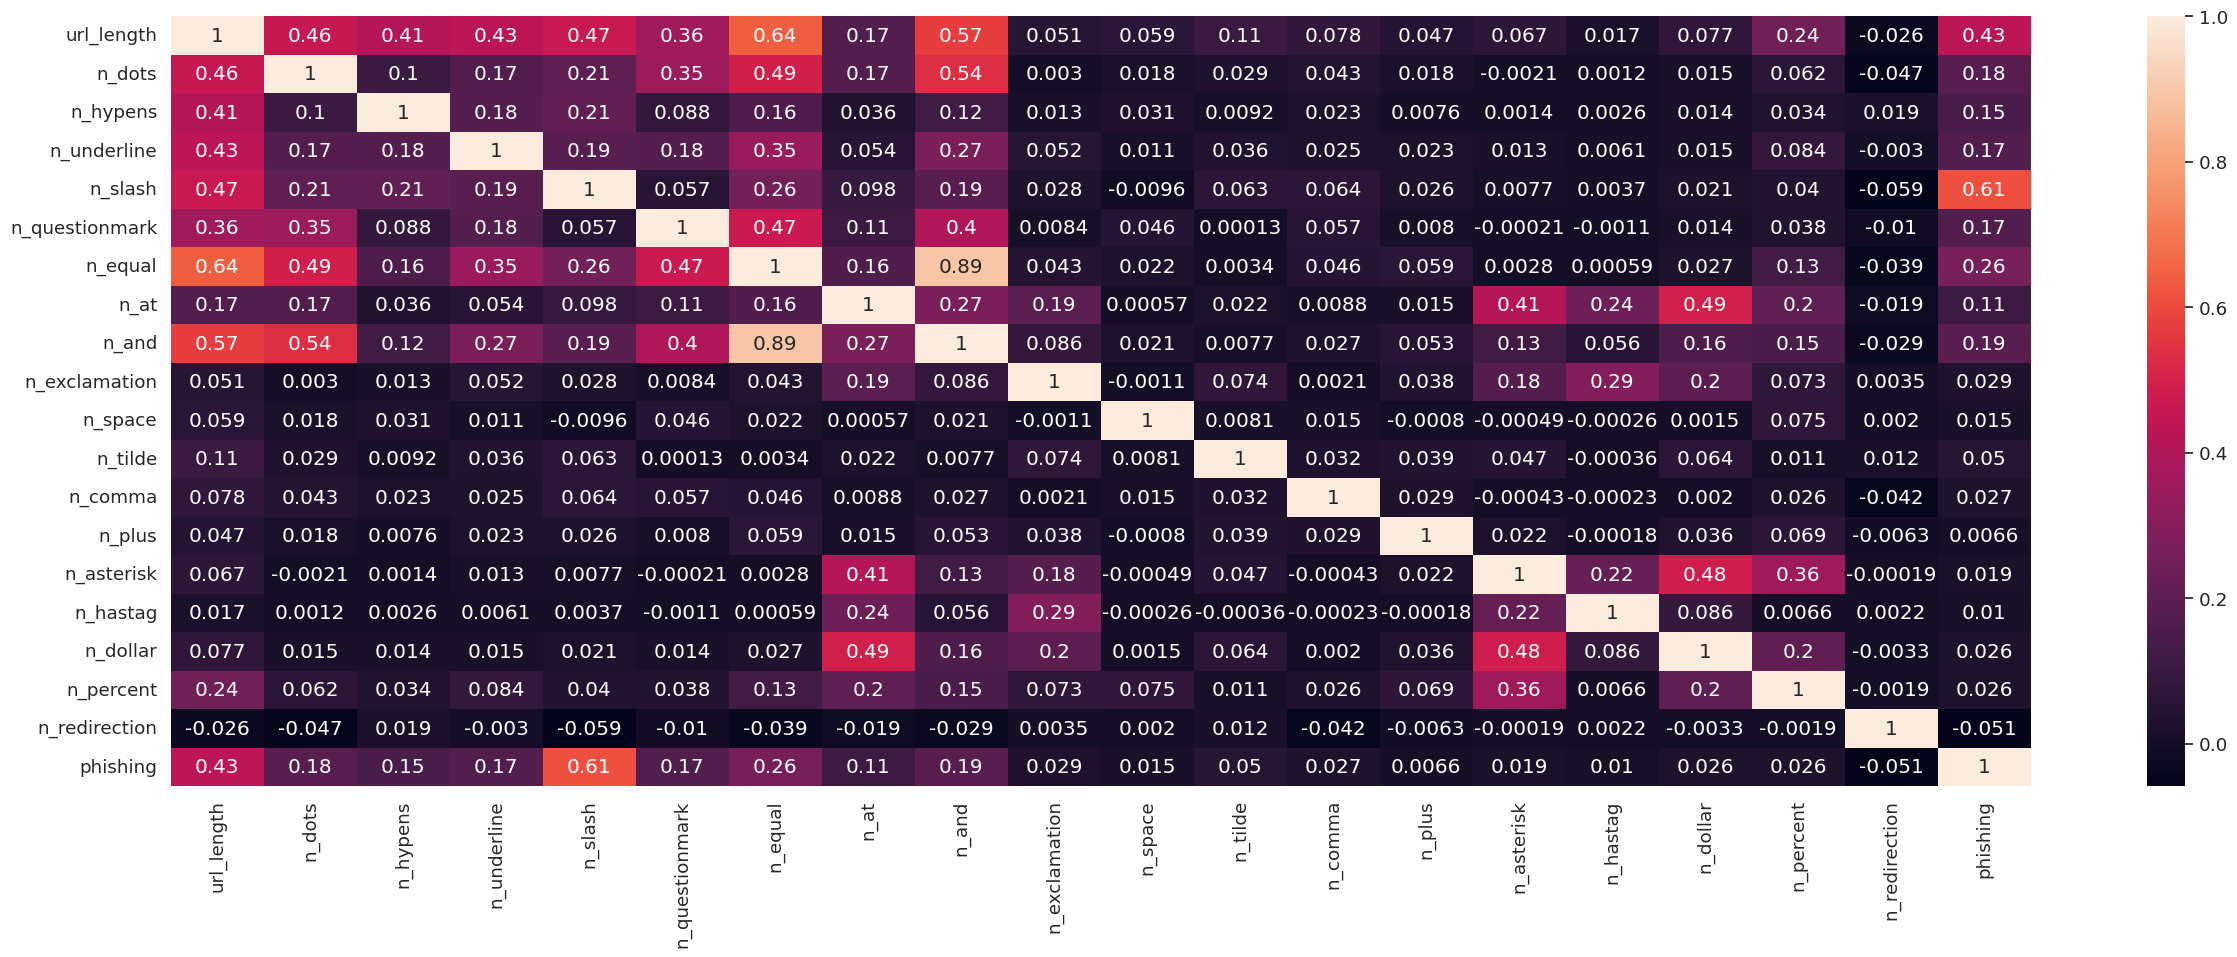

In [39]:
plt.figure(figsize=(30,10))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [21]:
plt.style.use('ggplot')
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [26]:
X = df.drop('phishing', axis=1)
y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeller

In [27]:
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
    GaussianNB()
]

In [28]:
results = []

In [29]:
for i, model in enumerate(model_list):
    print(f"Training model - {str(model)}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": model,
        "Accuracy": accuracy,
        "Precision (0)": report['0']['precision'],
        "Recall (0)": report['0']['recall'],
        "F1-score (0)": report['0']['f1-score'],
        "Precision (1)": report['1']['precision'],
        "Recall (1)": report['1']['recall'],
        "F1-score (1)": report['1']['f1-score']
    })

Training model - LogisticRegression()
Training model - DecisionTreeClassifier()
Training model - KNeighborsClassifier(n_neighbors=3)
Training model - RandomForestClassifier()
Training model - GradientBoostingClassifier()
Training model - AdaBoostClassifier(n_estimators=100)
Training model - MLPClassifier(max_iter=300)
Training model - GaussianNB()


End of Training


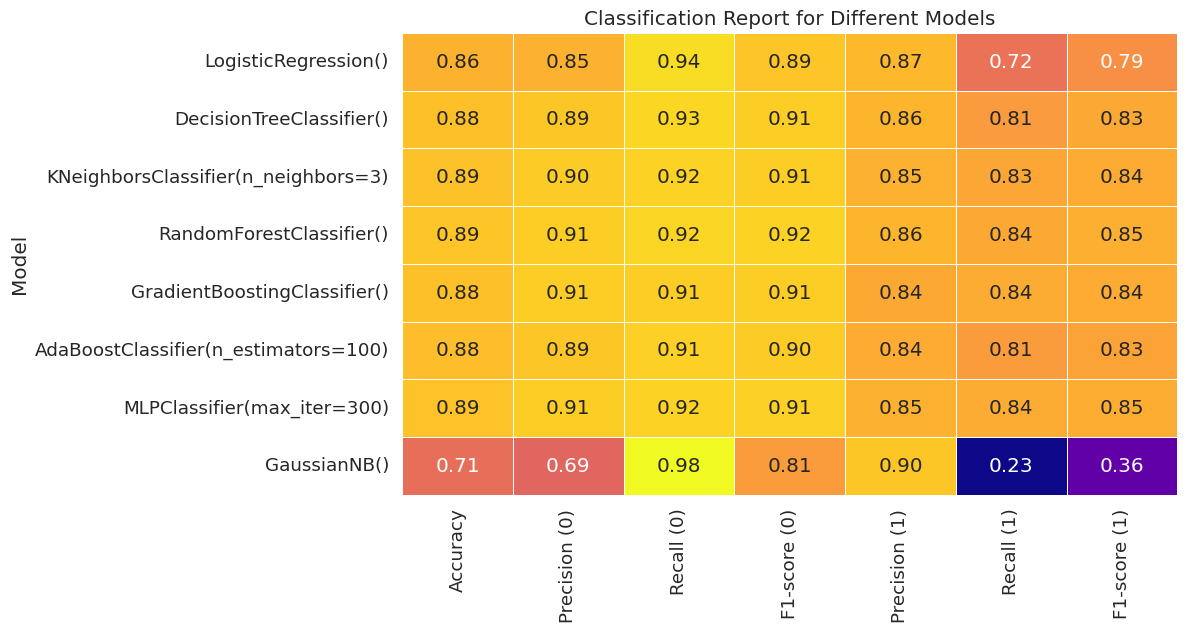

In [30]:
print("End of Training")
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
table = sns.heatmap(pd.DataFrame(results).set_index('Model'), annot=True, cmap="plasma", fmt=".2f", linewidths=.5, cbar=False)
plt.title("Classification Report for Different Models")
plt.show()

EN İYİ MODEL f1 Scoruna Göre

In [31]:
for model in results:
    model["F1-score Avg"] = (model["F1-score (0)"] + model["F1-score (1)"]) / 2

sorted_models = sorted(results, key=lambda x: x["F1-score Avg"], reverse=True)
best_model = sorted_models[0]

print(f"Most suitable model: {str(best_model['Model'].__class__.__name__)} - F1 Score Avg: {str(best_model['F1-score Avg'])}")

Most suitable model: RandomForestClassifier - F1 Score Avg: 0.882848113353593


In [32]:
from joblib import dump, load

dump(best_model['Model'], 'best_model.joblib')

['best_model.joblib']

TEST CROSS_VALİD

In [36]:
CrossValidResult = []

# Her model için çapraz doğrulama sonuçları (10x olarak belirledik)
for model in model_list:
    cv_results = cross_validate(model, X, y, cv=10,
                                scoring={'precision': 'precision',
                                         'recall': 'recall',
                                         'f1': 'f1',
                                         'accuracy': 'accuracy',
                                         'roc_auc': 'roc_auc',
                                         'average_precision': 'average_precision',
                                         'neg_brier_score': 'neg_brier_score'})

    model_results = {
        'Model': type(model).__name__,
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1': cv_results['test_f1'].mean(),
        'Accuracy': cv_results['test_accuracy'].mean(),
        'ROC AUC': cv_results['test_roc_auc'].mean(),
        'Average Precision': cv_results['test_average_precision'].mean(),
        'Neg Brier Score': cv_results['test_neg_brier_score'].mean()
    }

    CrossValidResult.append(model_results)

CrossValidResult_df = pd.DataFrame(CrossValidResult)
print(CrossValidResult_df)

                        Model  Precision  Recall     F1  Accuracy  ROC AUC  \
0          LogisticRegression     0.8724  0.6916 0.7632    0.8526   0.9190   
1      DecisionTreeClassifier     0.8359  0.7972 0.8161    0.8689   0.8827   
2        KNeighborsClassifier     0.7704  0.7807 0.7743    0.8402   0.8679   
3      RandomForestClassifier     0.8385  0.8074 0.8224    0.8750   0.9312   
4  GradientBoostingClassifier     0.8084  0.8330 0.8201    0.8692   0.9377   
5          AdaBoostClassifier     0.8341  0.7599 0.7806    0.8609   0.9359   
6               MLPClassifier     0.8323  0.8212 0.8266    0.8745   0.9430   
7                  GaussianNB     0.8948  0.2218 0.3527    0.7057   0.9012   

   Average Precision  Neg Brier Score  
0             0.8798          -0.1087  
1             0.8301          -0.1104  
2             0.7823          -0.1330  
3             0.8954          -0.0892  
4             0.9022          -0.0929  
5             0.8958          -0.2428  
6             0.9